In [2]:
import pandas as pd
proteomics = pd.read_excel(
    '../raw/Proteomics_vulcano_F-test_input_DM.xlsx',
)
proteomics.rename(
    columns = {
        'F-test: Mean log2(Ratio) - KO_grp1 vs WT': 'log2FC',
        'F-test: Moderated -log10(Pvalue)': '-log10(pvalue)'
    },
    inplace = True
)
proteomics

,Gene names,log2FC,-log10(pvalue)
0,Tecpr2,9.002911,1.694369
1,Psmc3,6.656874,0.155194
2,Agt,2.431391,4.533143
3,Sh3d21,2.401648,2.677114
4,C1qb,2.400351,4.938216
...,...,...,...
8253,Btf3,-3.103615,12.313374
8254,Uchl4,-3.152603,12.164777
8255,Nrp1,-2.401969,2.967190
8256,Fcrl1,-2.539066,12.111319


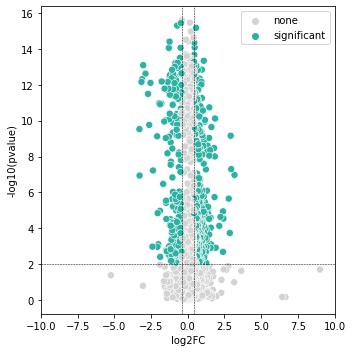

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
fig, ax = plt.subplots()
pval_threshold = 0.01
abs_lfc_threshold = 0.42
data = proteomics
hue_idx = (np.abs(data['log2FC'].astype(float)) >= abs_lfc_threshold) & \
    (data['-log10(pvalue)'].astype(float) > -np.log10(pval_threshold))

#hue_map = [s.metabolitegroupcoarse if sig else 'none' for (i, s), sig in zip(data.iterrows(), hue_idx)]
# palette_dict = {
#     k: sns.color_palette('husl', len(np.unique(hue_map)))[i] for i, k in enumerate(np.unique(hue_map))
# }
#palette_dict['none'] = 'lightgrey'

sns.scatterplot(
    x = data['log2FC'].astype(float),
    y = data['-log10(pvalue)'].astype(float),
    ax = ax,
    hue = ['significant' if i else 'none' for i in hue_idx],
    palette = {
        'significant': '#2CB1A2',
        'none': 'lightgrey'
    },
    s = 50
)

for x in [
    -abs_lfc_threshold, 
    abs_lfc_threshold
]:
    ax.axvline(
        x = x,
        ls = '--',
        lw = 0.5,
        c = 'k'
    )

ax.set_xlabel('log2FC')
ax.set_ylabel('-log10(pvalue)')

ax.axhline(
    y = -np.log10(pval_threshold),
    ls = '--',
    lw = 0.5,
    c = 'k'
)
ax.set_xlim(-10, 10)

fig.set_figwidth(5)
fig.set_figheight(5)
fig.tight_layout()
fig.savefig('../plots/proteomics_vulcano_50.pdf')

In [23]:
sum(hue_idx)

1471